# 목차
1. 변수 설명
2. EDA 

In [ ]:
sadads

## 1. 변수 설명
1. boost - 매치에서 유저가 사용한 부스트 아이템(음료수, 진통제, 아드레날린 주사) 개수
2. damageDealt - 매치에서 유저가 상대 유저에게 피해를 입힌 데미지량
3. headshotKills - 매치에서 상대 유저를 헤드샷으로 죽인 횟수
4. heals - 매치에서 사용할 힐 아이템(붕대, 구급상자, 의료용 키트) 개수
5. killPlace - 해당 매치에서 킬 수 순위(매치 순위와 무관)
6. kills - 해당 매치에서 상대 유저를 죽인 횟수
7. killStreaks - 해당 매치에서 짧은 시간 내에 발생한 가장 큰 연속 킬 수
8. longestKill - 해당 매치에서 유저의 킬 중, 가장 거리가 먼 킬의 값
9. rideDistance - 매치에서 유저가 차량(자동차, 오토바이, 보트 등)을 탄 거리
10. roadKills - 매치에서 유저가 차량 안에서 상대 유저를 죽인 수
11. swimDistance - 매치에서 유저가 수영한 거리
12. vehicleDestorys - 매치에서 유저가 차량을 폭발 또는 부순 개수
13. walkDistnace - 매치에서 유저가 걸어다닌 거리(meter)
14. weaponsAcquired  - 매치에서 유저가 무기를 획득한 횟수
15. winPlacePerc - 유저의 등수를 분위수로 변환한 값, 0은 꼴등, 1은 1등을 의미

In [177]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/pubg-finish-placement-prediction/train_V2.csv
/kaggle/input/pubg-finish-placement-prediction/test_V2.csv
/kaggle/input/pubg-finish-placement-prediction/sample_submission_V2.csv


In [178]:
# 패키지 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4f}'.format # 판다스 기술지표 소수 넷째 자리까지 표시
plt.style.use('fivethirtyeight')

In [179]:
# 데이터 불러오기
train = pd.read_csv('/kaggle/input/pubg-finish-placement-prediction/train_V2.csv')
test = pd.read_csv('/kaggle/input/pubg-finish-placement-prediction/test_V2.csv')

## 2. EDA(Exploratory Data Analysis)

In [180]:
# 훈련용 데이터 파악
train.shape
# 70%

(4446966, 29)

In [181]:
# 테스트용 데이터 파악
test.shape
# 30%

(1934174, 28)

In [182]:
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.0000,0,0,0,60,...,0,0.0000,0,0.0000,0,0,244.8000,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.4700,0,0,0,57,...,0,0.0045,0,11.0400,0,0,1434.0000,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.0000,0,0,0,47,...,0,0.0000,0,0.0000,0,0,161.8000,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.9000,0,0,0,75,...,0,0.0000,0,0.0000,0,0,202.7000,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.0000,0,0,0,45,...,0,0.0000,0,0.0000,0,0,49.7500,2,0,0.1875


- train data set

4,446,966개의 index와 29개의 feature가 있음.

In [183]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(19), object(4)
memory usage: 983.9+ MB


In [184]:
# 연속형 변수들의 기술적 지표
train.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4446966.0000,4446966.0000,4446966.0000,4446966.0000,4446966.0000,4446966.0000,4446966.0000,4446966.0000,4446966.0000,4446966.0000,...,4446966.0000,4446966.0000,4446966.0000,4446966.0000,4446966.0000,4446966.0000,4446966.0000,4446966.0000,4446966.0000,4446965.0000
mean,0.2338,1.1069,130.7171,0.6579,0.2268,1.3701,47.5994,505.0060,0.9248,0.5440,...,0.1647,606.1157,0.0035,4.5093,0.0239,0.0079,1154.2179,3.6605,606.4601,0.4728
std,0.5886,1.7158,170.7806,1.1457,0.6022,2.6800,27.4629,627.5049,1.5584,0.7110,...,0.4722,1498.3435,0.0734,30.5022,0.1674,0.0926,1183.4970,2.4565,739.7004,0.3074
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,24.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,155.1000,2.0000,0.0000,0.2000
50%,0.0000,0.0000,84.2400,0.0000,0.0000,0.0000,47.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,685.6000,3.0000,0.0000,0.4583
75%,0.0000,2.0000,186.0000,1.0000,0.0000,2.0000,71.0000,1172.0000,1.0000,1.0000,...,0.0000,0.1910,0.0000,0.0000,0.0000,0.0000,1976.0000,5.0000,1495.0000,0.7407
max,22.0000,33.0000,6616.0000,53.0000,64.0000,80.0000,101.0000,2170.0000,72.0000,20.0000,...,39.0000,40710.0000,18.0000,3823.0000,12.0000,5.0000,25780.0000,236.0000,2013.0000,1.0000


In [185]:
# 결측값
train.isna().sum().to_frame()

,0
Id,0
groupId,0
matchId,0
assists,0
boosts,0
damageDealt,0
DBNOs,0
headshotKills,0
heals,0
killPlace,0


In [186]:
# 결측값 row
train.loc[train['winPlacePerc'].isna()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0000,0,0,0,1,...,0,0.0000,0,0.0000,0,0,0.0000,0,0,nan


- 'winPlacePerc'에 하나의 결측값이 있다. 이는 분석을 위해 제거할 예정.

## 2. EDA

### 2-1) match types

In [187]:
# 몇번의 매치로부터 추출된 데이터들인가?
train.loc[:, 'matchId'].nunique()

47965

- 47965게임으로부터 추출된 데이터임을 알 수 있다.

In [188]:
# 게임 종류(match type)에 따라 나누기
match_type = train.loc[:, 'matchType'].value_counts().to_frame().reset_index()
match_type.columns = ['matchType', 'Count']
match_type

,matchType,Count
0,squad-fpp,1756186
1,duo-fpp,996691
2,squad,626526
3,solo-fpp,536762
4,duo,313591
5,solo,181943
6,normal-squad-fpp,17174
7,crashfpp,6287
8,normal-duo-fpp,5489
9,flaretpp,2505


- Match type
 1. Squad
 2. Duo
 3. Solo
- View mode
 1. FPP (1인칭)
 2. TPP (2인칭)
 3. Normal (짬뽕)
 
 *flare과 crash모드는 이벤트 모드로 간주*
 
 *Squad는 4명이 반드시 참여한 게임? 아니면 1명을 묶어서 4명으로 간주되는 게임?*

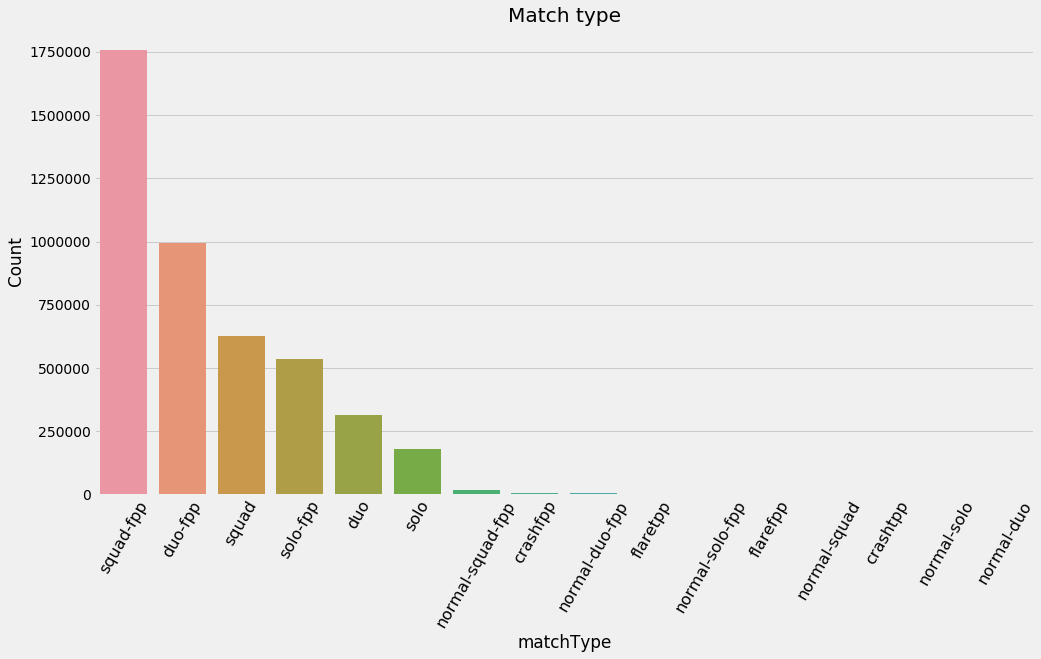

In [189]:
plt.figure(figsize=(15,8))
type_count = match_type.matchType.values
ax = sns.barplot(x='matchType', y='Count', data=match_type)
ax.set_xticklabels(type_count, rotation=60, fontsize=16)
ax.set_title('Match type')
plt.show()

- 그래프상으로는 squad와 duo의 1인칭 게임이 많은 것으로 보임
- 4명이 같은 게임에 접속한 것도 카운트가 되는건가?

In [190]:
# Squad, Duo, Solo로 분류
match_type2 = train.loc[:, 'matchType'].value_counts().to_frame()
class_squad = match_type2.loc[["squad-fpp","squad","normal-squad-fpp","normal-squad"],"matchType"].sum()
class_duo = match_type2.loc[["duo-fpp","duo","normal-duo-fpp","normal-duo"],"matchType"].sum()
class_solo = match_type2.loc[["solo-fpp","solo","normal-solo-fpp","normal-solo"],"matchType"].sum()
classify = pd.DataFrame([class_squad, class_duo, class_solo], index=['squad', 'duo', 'solo'], columns = ['Count'])
classify

psquad = classify.loc['squad', 'Count']
pduo = classify.loc['duo', 'Count']
psolo = classify.loc['solo', 'Count']
total = psquad + pduo + psolo

print('전체 중에서 스쿼드의 비율은 %.2f, 듀오의 비율은 %.2f, 솔로의 비율은 %.2f입니다.' 
      % (psquad / total, pduo / total, psolo / total))

전체 중에서 스쿼드의 비율은 0.54, 듀오의 비율은 0.30, 솔로의 비율은 0.16입니다.


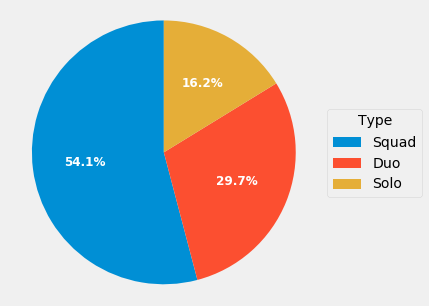

In [191]:
# 위의 결과를 시각화
fig1, ax1 = plt.subplots(figsize=(5, 5))
labels = ['Squad', 'Duo', 'Solo']

wedges, texts, autotexts = ax1.pie(classify['Count'], textprops=dict(color='w'), 
                                   autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
ax1.legend(wedges, labels,
          title='Type',
          loc='center left',
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=12, weight='bold')
plt.show()

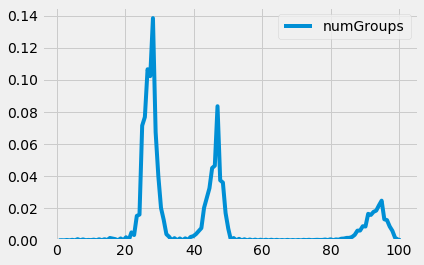

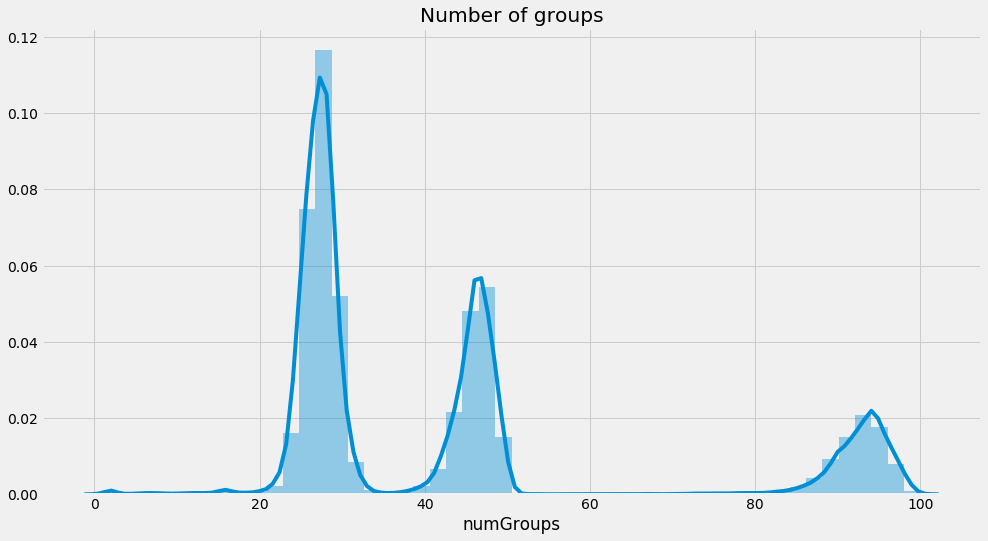

In [192]:
# 한 매치에 몇팀?
sns.kdeplot(train['numGroups'], bw=0.15)

plt.figure(figsize=(15,8))
ax = sns.distplot(train['numGroups'])
ax.set_title('Number of groups')
plt.show()

- 스쿼드는 0.3의 구간, 듀오는 0.5의 구간, 솔로는 0.9의 구간으로 추정

### 2-2) Kills & damage Dealt

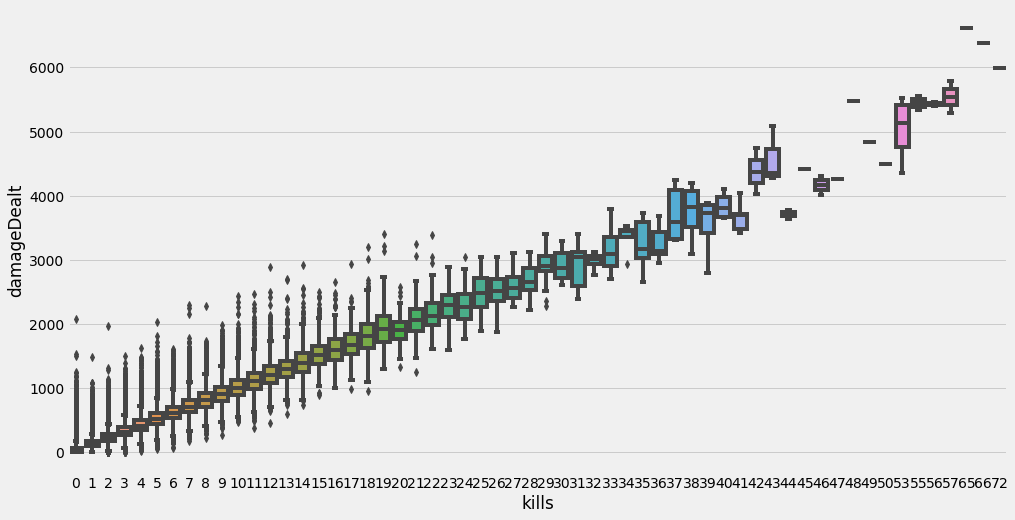

In [193]:
plt.figure(figsize=(15,8))
ax1 = sns.boxplot(x='kills', y='damageDealt', data=train)
ax.set_title('Kills & Damage Dealt')
plt.show()

- 킬과 데미지 넣은 것과의 상관관계가 있어 보인다.
- 킬이 낮을수록 이상치가 굉장히 많을 것을 볼 수 있다.
    - *팀원이 존재할때는 revive가 있기 때문이 아닐까? (후반갈수록 팀원이 줄어들음)*


- **43킬부터 양상이 조금 이상하다. 핵쟁이가 있는 것은 아닐까?**
 1. 헤드샷 비율이 0.5가 넘을 것이다.
 2. 먼거리 킬이 굉장히 클 수 있다.


In [194]:
# 핵쟁이를 찾아보자.
train[(train['kills'] > 43) & (train['headshotKills']/train['kills'] > 0.5)][
    ['assists', 'damageDealt', 'headshotKills', 'kills', 'longestKill']]

,assists,damageDealt,headshotKills,kills,longestKill
1454065,2,4495.0000,42,50,324.2000
2020831,2,4889.0000,46,53,690.4000
2601666,5,4347.0000,31,53,135.6000
2914453,2,4840.0000,27,49,188.7000
3431247,7,5990.0000,64,72,78.2300
3673965,2,5330.0000,41,55,310.3000


약 6명의 인원들이 상당히 높은 비율(0.5 초과)의 헤드샷임을 알 수 있다.(게이머도 이정도의 헤드샷은 불가능)

전체 데이터에 큰 영향을 주지 않겠지만, 제거하는 방향으로 생각해볼 수 있다.

### 2-3) Driving, Walking

In [195]:
# 단 한 걸음도 걷지 않은 사람 - 연결이 안된 사람으로 추정(결측값)
no_walk = train['walkDistance'] == 0
print('한번도 걷지 않은 사람은 %d명이다.' % (no_walk.sum()))

한번도 걷지 않은 사람은 99603명이다.


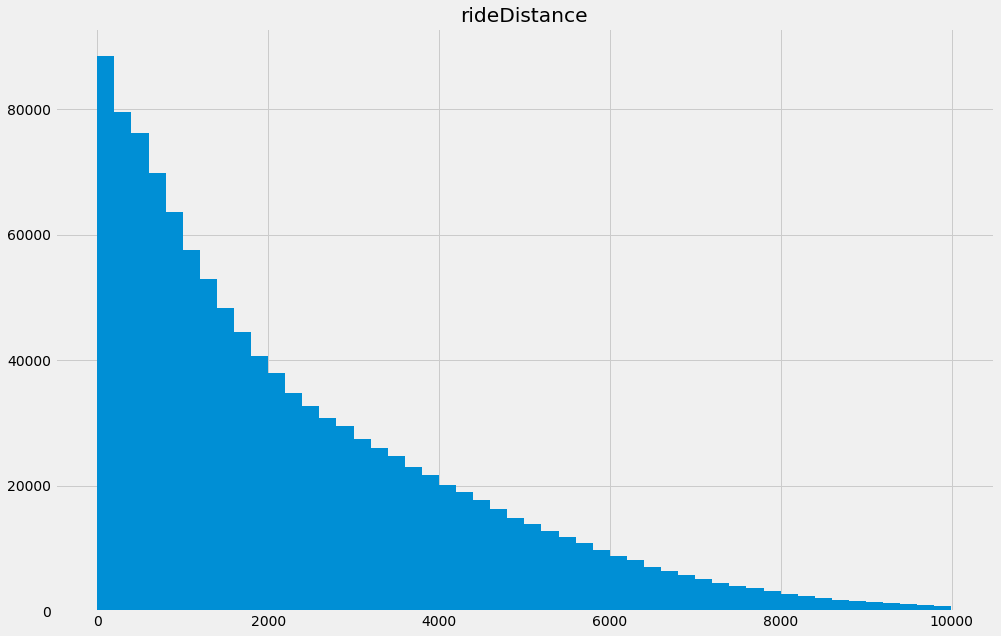

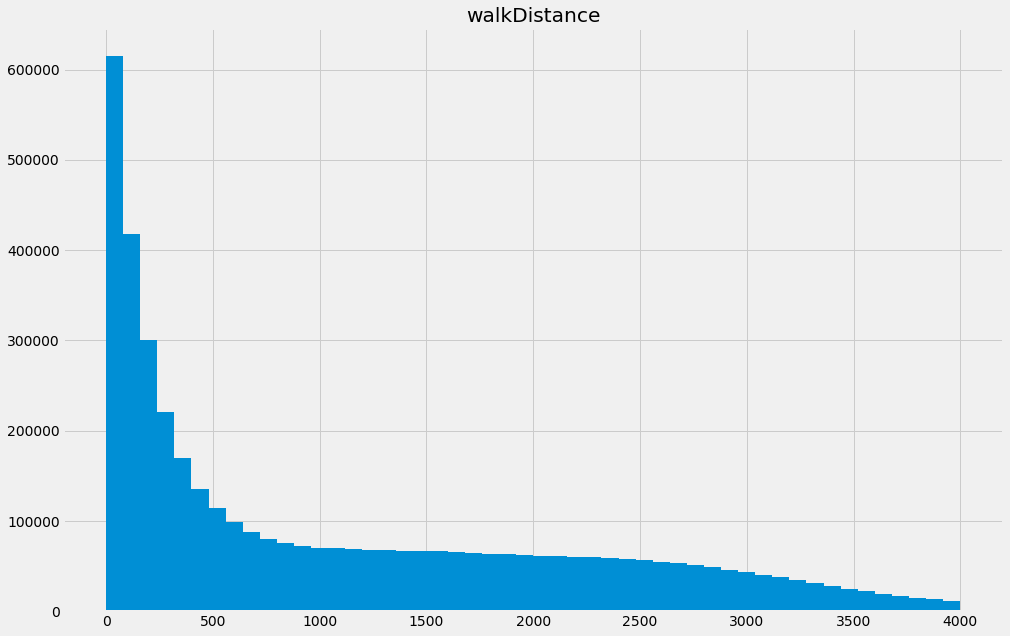

In [196]:
# 걷거나 운행을 한 거리를 비교
ride = train.query('rideDistance >0 & rideDistance <10000')
walk = train.query('walkDistance >0 & walkDistance <4000')
ride.hist('rideDistance', bins=50, figsize = (15,10))
walk.hist('walkDistance', bins=50, figsize = (15,10))
plt.show()

- 차량의 운행거리는 지수적으로 감수한다.
- 게임이 후반부에 치닫을수록 차량은 전략적으로 노출되기 쉽기 때문에 선호하지 않는 경향이 있을 것.

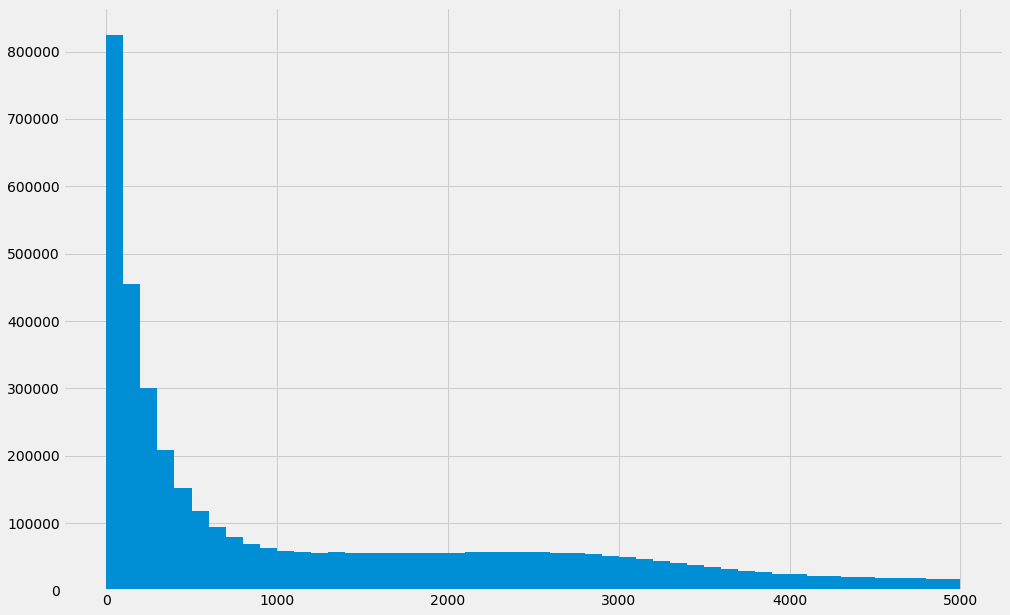

In [197]:
# 총 Distance는 어떤식?
travel_dist = train["walkDistance"] + train["rideDistance"] + train["swimDistance"]
travel_dist = travel_dist[travel_dist<5000]
travel_dist.hist(bins=50, figsize = (15,10))
plt.show()

그래프의 그림이 walk와 유사하다. 즉 가중치가 상당히 Walk로 치우쳐져 있을 가능성이 높다.

### 2-4) Weapons acquired

In [198]:
train['weaponsAcquired'].describe()

count   4446966.0000
mean          3.6605
std           2.4565
min           0.0000
25%           2.0000
50%           3.0000
75%           5.0000
max         236.0000
Name: weaponsAcquired, dtype: float64

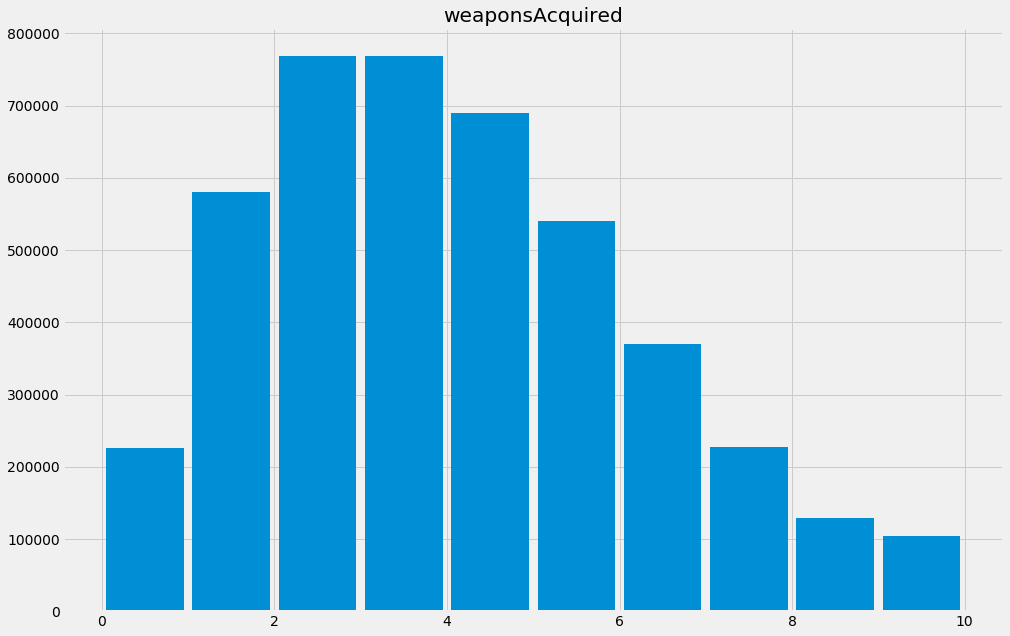

In [199]:
train.hist('weaponsAcquired', figsize=(15, 10), range=(0, 10), rwidth=0.9)
plt.show()

### 2-5) Correlation map

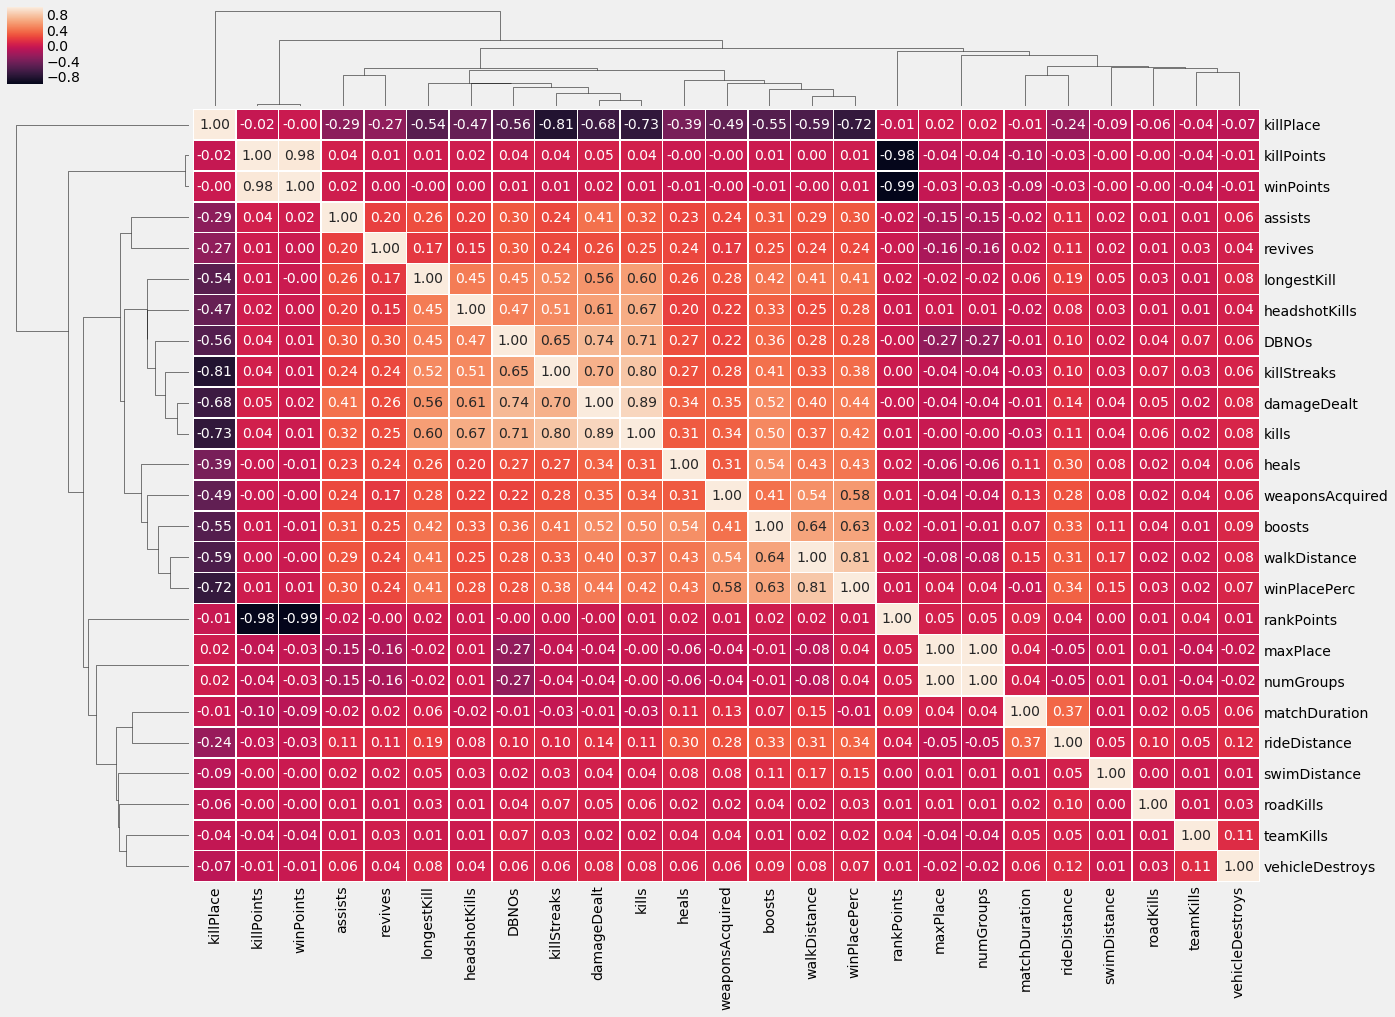

In [200]:
ax = sns.clustermap(train.corr(), annot=True, linewidths=.6, fmt= '.2f', figsize=(20, 15))
plt.show()

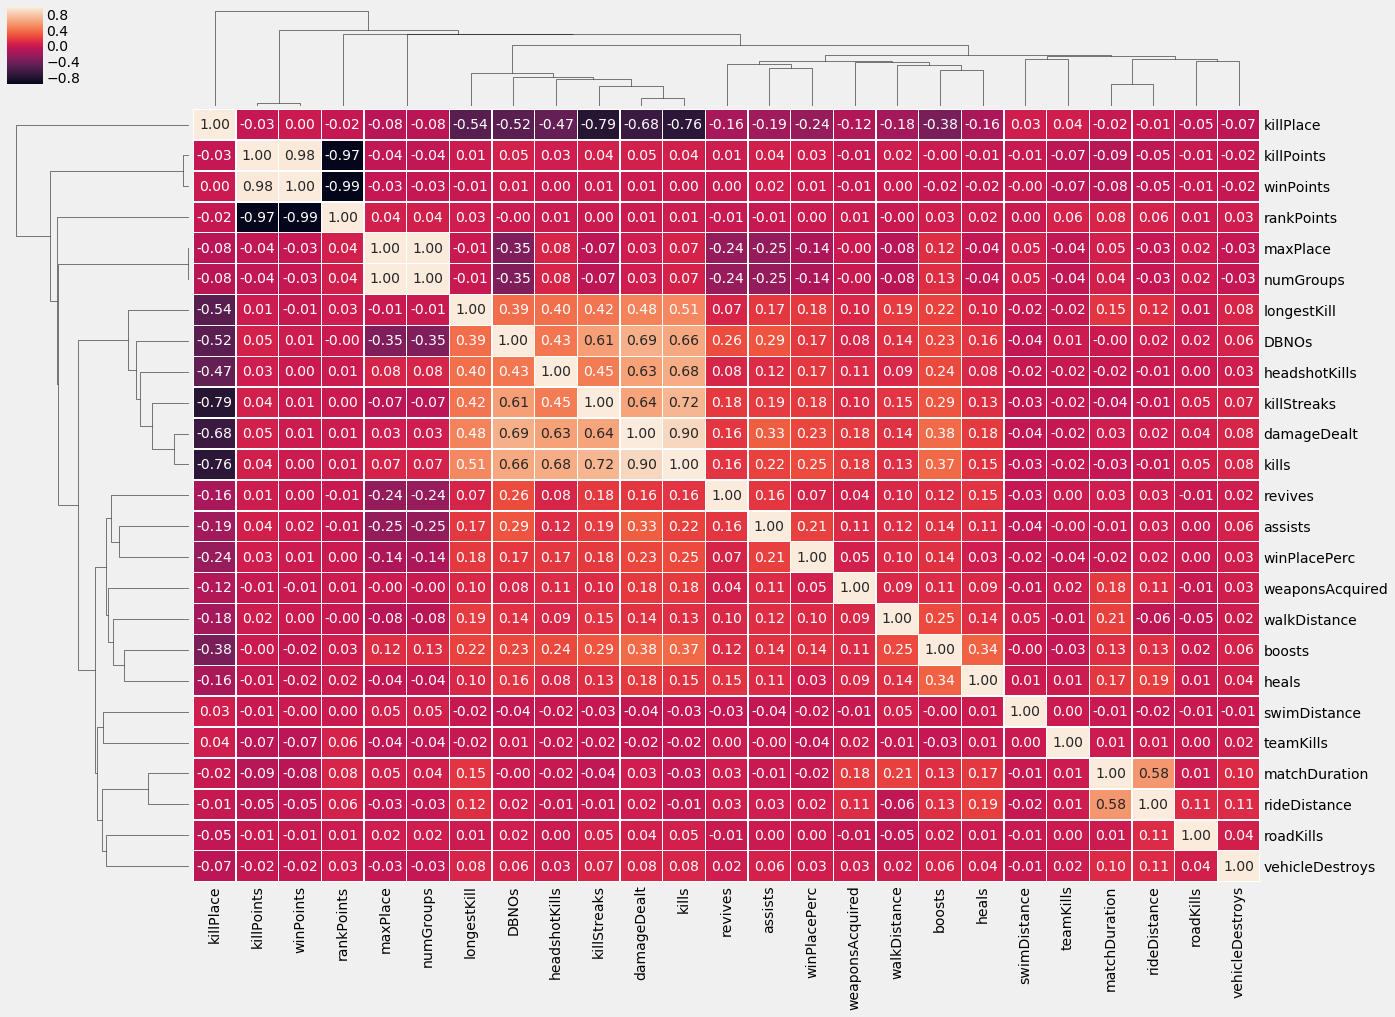

In [201]:
# 상위 10% 이내에 드는 플레이어들의 상관관계
tenPerc = train[train['winPlacePerc']>0.9]
ax = sns.clustermap(tenPerc.corr(), annot=True, linewidths=.5, fmt= '.2f', figsize=(20, 15))
plt.show()

- Kill이 포함된 feature와 DamageDealt간의 관계가 높을 것으로 추정.
- 0.9 초과한 상관계수는 두 변수가 종속적인 관계의 feature로 추정(유의하지 않을것으로 봄)